In [0]:
# Data from courtesy of amittiwari42

# https://github.com/amittiwary42/Resume-Classifier/tree/master/CVs

In [104]:
!pip install pdfminer.six

In [105]:
!ls "gdrive/My Drive/Resume Classifier /CVs"

c10.pdf  c20.pdf  c30.pdf  c40.pdf  c50.pdf  c60.pdf  c70.pdf  c80.pdf	c90.pdf
c11.pdf  c21.pdf  c31.pdf  c41.pdf  c51.pdf  c61.pdf  c71.pdf  c81.pdf	c91.pdf
c12.pdf  c22.pdf  c32.pdf  c42.pdf  c52.pdf  c62.pdf  c72.pdf  c82.pdf	c92.pdf
c13.pdf  c23.pdf  c33.pdf  c43.pdf  c53.pdf  c63.pdf  c73.pdf  c83.pdf	c93.pdf
c14.pdf  c24.pdf  c34.pdf  c44.pdf  c54.pdf  c64.pdf  c74.pdf  c84.pdf	c94.pdf
c15.pdf  c25.pdf  c35.pdf  c45.pdf  c55.pdf  c65.pdf  c75.pdf  c85.pdf	c95.pdf
c16.pdf  c26.pdf  c36.pdf  c46.pdf  c56.pdf  c66.pdf  c76.pdf  c86.pdf	c96.pdf
c17.pdf  c27.pdf  c37.pdf  c47.pdf  c57.pdf  c67.pdf  c77.pdf  c87.pdf	c97.pdf
c18.pdf  c28.pdf  c38.pdf  c48.pdf  c58.pdf  c68.pdf  c78.pdf  c88.pdf	c9.pdf
c19.pdf  c29.pdf  c39.pdf  c49.pdf  c59.pdf  c69.pdf  c79.pdf  c89.pdf
c1.pdf	 c2.pdf   c3.pdf   c4.pdf   c5.pdf   c6.pdf   c7.pdf   c8.pdf


In [0]:
import numpy as np
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [0]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [0]:

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [109]:
# For Testing Purpose 

text = convert_pdf_to_txt("gdrive/My Drive/Resume Classifier /CVs/c10.pdf")

print(text)

RAHUL SRIVASTAVA

Room No: C-342,  LLR Hall of Residence , IIT Kharagpur

Ph: 9732961707, Email : rahusr@gmail.com     

                                    
Academic Qualifications
Examination 
Dual Degree(Hons.),Computer Science & Engineering
Class XII
Class X

Academic Distinctions

Year 
2011
2003
2001

Board/University
IIT Kharagpur
CBSE
CBSE

%/CGPA 
8.18/10
88%
84%

State Rank 55 in UPSEAT (Uttar Pradesh State Engineering Admission Test) among 80,000 candidates, 2006

 All India Rank 482 in IIT-JEE examination among 300,000 candidates, 2006

 All India Rank 1078(with 98.99 percentile) in GATE examination among 107,086 candidates, 2010.


 Offered scholarship for summer internship at Universidad de Guanajuato in Mexico, 2010 

9.75/10 GPA in 8th semester (10/10 in Project, 10/10 in 4 Courses) at IIT Kharagpur, 2010
Recipient of GATE MHRD scholarship given by Gov. of India, May 2010 to April 2011

Work Experience/ Internship
Laboratory of Vision, Robotics and Artificial Inte

In [0]:
import glob 

resume_list = []

def FullPath(num):
    return "gdrive/My Drive/Resume Classifier /CVs/c" + str(num) + ".pdf"
    
allResumes = []
ResumeVals = []

for filepath in glob.iglob("gdrive/My Drive/Resume Classifier /CVs/*.pdf"):
    a = filepath.find(".")
    b = filepath.find("c")

    ResumeVals.append(int(filepath[b + 1 : a]))
    
ResumeVals = sorted(ResumeVals)

ResumePaths = list(map(FullPath , ResumeVals))

for i in ResumePaths :
    text = convert_pdf_to_txt(i)
    allResumes.append(text)
     


In [111]:
print(allResumes[1])

SIDDHARTH RAGHUVANSHI                                Roll No. 06CS3025                                            DOB: 08/08/1988 
Email: siddharth.iitkharagpur@gmail.com                                                                                          Mobile No.:   +91 9932584135 
 

Degree/Certificate 

Dual Degree[B. Tech (H) + M. Tech] 
(Computer Science & Engineering) 

Class XII:  C.B.S.E. 
Class X:   C.B.S.E. 

 

ACADEMIC ACHIEVEMENTS 

Institute/ School, City 

Indian Institute of Technology, Kharagpur 

Central Hindu School, Varanasi 

St. Atulanand Convent School, Varanasi 

CGPA/ %  Completion 

8.26/10 

86.0% 
90.8% 

2011 

2005 
2003 

Competitive 
Examinations 

  All India Rank 116 in AIEEE, 2006 among 470,000 students, State Rank 8 in Uttar Pradesh. 
  All India Rank 119 in 7th National Science Olympiad, 2005. 
  All India Rank 22 in All India Level Mathematics & Science Test organized by Central Institute  for 

Proficiency in English Language (CIPEL). 

 

In [0]:
import string 

table_1 = str.maketrans({key: None for key in string.punctuation})

def Translate(Str):
    Str = Str.translate(table_1)
    Str = Str.rstrip()
    Str = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', Str)
    
    return Str 

Resumes = list(map(Translate , allResumes))

In [113]:
print(Resumes[1])

SIDDHARTH RAGHUVANSHI                                Roll No 06CS3025                                            DOB 08081988 
Email siddharthiitkharagpurgmailcom                                                                                          Mobile No   91 9932584135 
 

DegreeCertificate 

Dual DegreeB Tech H  M Tech 
Computer Science  Engineering 

Class XII  CBSE 
Class X   CBSE 

 

ACADEMIC ACHIEVEMENTS 

Institute School City 

Indian Institute of Technology Kharagpur 

Central Hindu School Varanasi 

St Atulanand Convent School Varanasi 

CGPA   Completion 

82610 

860 
908 

2011 

2005 
2003 

Competitive 
Examinations 

  All India Rank 116 in AIEEE 2006 among 470000 students State Rank 8 in Uttar Pradesh 
  All India Rank 119 in 7th National Science Olympiad 2005 
  All India Rank 22 in All India Level Mathematics  Science Test organized by Central Institute  for 

Proficiency in English Language CIPEL 

 

 

Scholastic 

Achievements 

  National top 1 out o

In [0]:
Targets = []
for i in range(36):
    Targets.append(1)
for i in range(61):
    Targets.append(0)


In [0]:
# Data Balancing

# According to Data , 36 are Good Cvs and 61 are Bad Cvs 
# Even if our model says all as bad Cvs we would get accuracy of 63% 
# We want the chance to be 50% - 50%

idxs = np.random.choice(np.arange(0 , 35 , 1), size=25)
extra = [Resumes[i] for i in idxs]
Resumes += extra

for i in range(25):
    Targets.append(1)
    
    
Targets = np.array(Targets)

In [0]:
Xtrain, Xtest , Ytrain, Ytest = train_test_split(Resumes , Targets , test_size=0.25, random_state=0)

In [0]:
vectorizer = TfidfVectorizer(analyzer="word", stop_words="english", max_features=250)

TrainFeatures = vectorizer.fit_transform(Xtrain)

# Converting Sparse Matrix to Nd array
Xtrain = TrainFeatures.toarray()

TestFeatures = vectorizer.transform(Xtest)
Xtest = TestFeatures.toarray()

In [118]:
print(Xtrain.shape)
print(Xtest.shape)

(91, 250)
(31, 250)


In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**Testing Out with ML models **

** Decision Tree **

In [120]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(Xtrain, Ytrain)

Ypred = DecisionTree.predict(Xtest)

print(DecisionTree.score(Xtrain, Ytrain))
print(DecisionTree.score(Xtest, Ytest))

1.0
0.8709677419354839


Confusion matrix, without normalization
[[14  0]
 [ 4 13]]


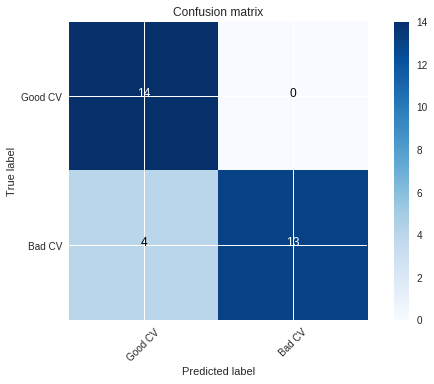

In [121]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** Random Forest  **

In [122]:
RandomForest = RandomForestClassifier()

RandomForest.fit(Xtrain, Ytrain)

Ypred = RandomForest.predict(Xtest)

print(rfclf.score(Xtrain, Ytrain))
print(rfclf.score(Xtest, Ytest))

0.5714285714285714
0.5806451612903226


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix, without normalization
[[13  1]
 [ 5 12]]


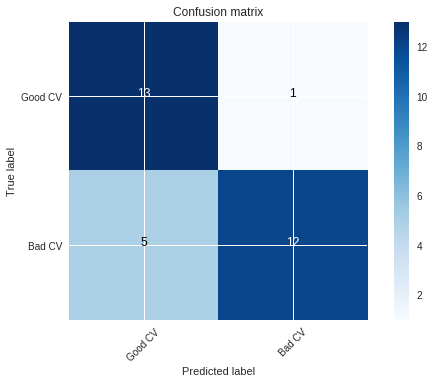

In [123]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** Support Vector Machines **

In [124]:
SVM = svm.SVC()
SVM.fit(Xtrain, Ytrain)

Ypred = SVM.predict(Xtest)

print(SVM.score(Xtrain, Ytrain))
print(SVM.score(Xtest, Ytest))

0.5164835164835165
0.45161290322580644


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
[[14  0]
 [17  0]]


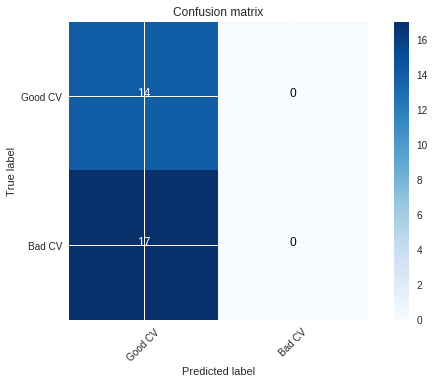

In [125]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** Naive Bayes **

In [126]:
BerNB = BernoulliNB()
BerNB.fit(Xtrain, Ytrain)

Ypred = BerNB.predict(Xtest)

print(bnbclf.score(Xtrain, Ytrain))
print(bnbclf.score(Xtest, Ytest))

0.6043956043956044
0.6451612903225806


Confusion matrix, without normalization
[[13  1]
 [ 0 17]]


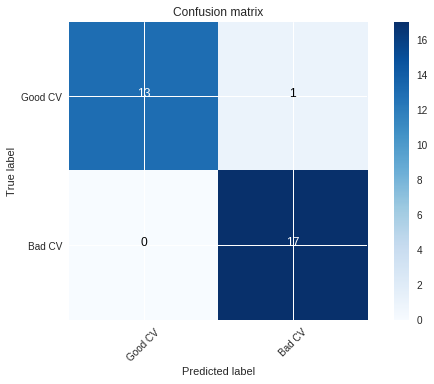

In [127]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

In [128]:
GauNB = GaussianNB()
GauNB.fit(Xtrain, Ytrain)

Ypred = GauNB.predict(Xtest)

print(GauNB.score(Xtrain, Ytrain))
print(GauNB.score(Xtest, Ytest))

0.967032967032967
1.0


Confusion matrix, without normalization
[[14  0]
 [ 0 17]]


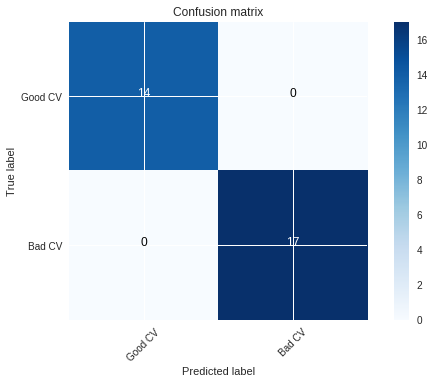

In [129]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** AdaBoost **

In [130]:
from sklearn.ensemble import AdaBoostClassifier

AdBoost = AdaBoostClassifier()

AdBoost.fit(Xtrain, Ytrain)

Ypred = AdBoost.predict(Xtest)

print(AdBoost.score(Xtrain, Ytrain))
print(AdBoost.score(Xtest, Ytest))

1.0
0.967741935483871


Confusion matrix, without normalization
[[13  1]
 [ 0 17]]


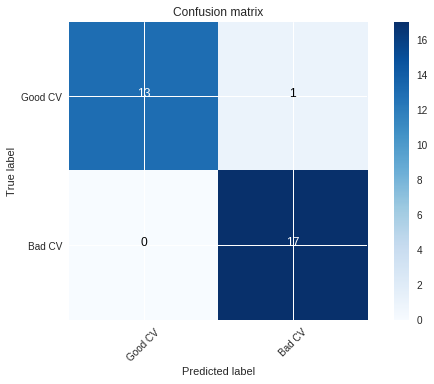

In [131]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** Custom Made Models **

In [0]:
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from future.utils import iteritems

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)

In [133]:
model = NaiveBayes()

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9230769230769231
0.8709677419354839


Confusion matrix, without normalization
[[11  3]
 [ 1 16]]


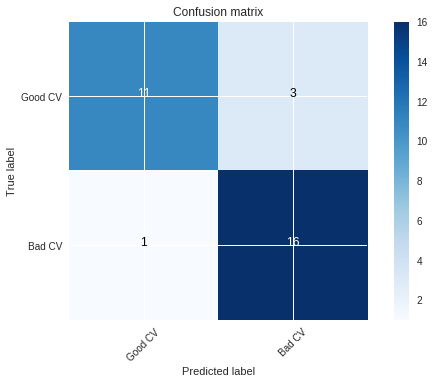

In [134]:
cnf_matrix = confusion_matrix(Ytest, Ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good CV' , 'Bad CV'],
                      title='Confusion matrix')

plt.show()

** The Results are much better on AdaBoost with Precision => 92.85 and Recall => 100 , GaussianNB with Precision => 100 and Recall => 100  **

** The Results are poor on Support Vector Classifier with Precision => 100 and Recall => 45.16 , it predicted everything to be a Good cv **